In [1]:
import numpy as np
nbins = 128
nsamples=100_000
steps = 1000
mean = [0.1, 0.3]
cov = [[0.01, 0], [0, 0.09]]
rdata = np.random.multivariate_normal(mean, cov, size=(nsamples))
h, *_ = np.histogram2d(rdata[:,0],rdata[:,1], bins=nbins, range=((-1.0,1.0),(-1.0,1.0)))
hist = np.ascontiguousarray(h)

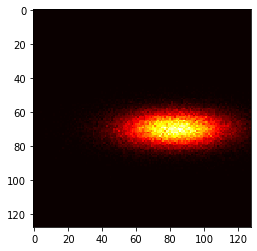

In [2]:
import matplotlib.pyplot as plt
plt.imshow(hist, cmap='hot', interpolation='nearest')

In [3]:
import gzip

mv = memoryview(hist)

%timeit gzip.compress(mv, compresslevel=6)
gzip_comp = gzip.compress(mv, compresslevel=6)
gzip_len = len(gzip_comp)

1.23 ms ± 8.21 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [4]:
import lz4.frame

mv = memoryview(hist)

%timeit lz4.frame.compress(mv, compression_level=lz4.frame.COMPRESSIONLEVEL_MIN)
lz4_comp = lz4.frame.compress(mv, compression_level=lz4.frame.COMPRESSIONLEVEL_MIN)
lz4_len = len(lz4_comp)

40.8 µs ± 427 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [5]:
gzip_len / lz4_len

0.4320797536067434

In [21]:
%timeit gzip_rows = [gzip.compress(hist[i], compresslevel=6) for i in range(nbins)]
gzip_rows = [gzip.compress(hist[i], compresslevel=6) for i in range(nbins)]

2.99 ms ± 23.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [22]:
%timeit lz4_rows = [lz4.frame.compress(hist[i], compression_level=lz4.frame.COMPRESSIONLEVEL_MIN) for i in range(nbins)]
lz4_rows = [lz4.frame.compress(hist[i], compression_level=lz4.frame.COMPRESSIONLEVEL_MIN) for i in range(nbins)]

211 µs ± 4.08 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [23]:
gzip_split_len = np.sum(list(map(len, gzip_rows)))
lz4_split_len = np.sum(list(map(len, lz4_rows)))
print(gzip_split_len, lz4_split_len, gzip_split_len/lz4_split_len)

10230 17929 0.5705839701043003
